## Table of Contents
- #### <a href="#dp" style='color:black; text-decoration:none'>Data Processing</a>
<ul>
<li><a href="#ohe">One Hot Encoding</a></li>
<li><a href="#ss">Standard Scaling</a></li>
</ul>
- #### <a href="#mm" style='color:black; text-decoration:none'>ML Models</a>
<ul>
<li><a href="#lr">Logistic Regression</a></li>
<li><a href="#svm">Support Vector Machines</a></li>
<li><a href="#dtc">Decision Tree Classifier</a></li>
<li><a href="#knn">KNeighbors Classifier</a></li>
</ul>
- #### <a href="#" style='color:black; text-decoration:none'>Models Evaluation</a>

<a name="dp"></a>
# Data Processing

In [96]:
# import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [97]:
df=pd.read_csv('dataset3.csv')

In [98]:
df.head(4)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1,2010
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1,2012
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1,2013
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013


In [99]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'year'],
      dtype='object')

reliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [100]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins',
               'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial','Class']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,1
1,8,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,1
2,10,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,1
3,11,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,12,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,1


In [101]:
print(f'mean of payload :{round(features["PayloadMass"].mean())}')
print(f'median of payload :{round(features["PayloadMass"].median())}')

mean of payload :7879
median of payload :5800


In [102]:
features["PayloadMass"]=features["PayloadMass"].fillna(features["PayloadMass"].median())

<a name="ohe"></a>
## One Hot Encoding

In [103]:
cat_col=features.columns[features.dtypes == 'object']
features=pd.get_dummies(features, cat_col)

In [104]:
features=features.astype(float)

In [105]:
features.head(4)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1073
0,6.0,5800.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name="ss"></a>
## Standard Scaling

In [106]:
X= features.drop('Class', axis=1).to_numpy()
y=features['Class'].to_numpy()

<a name="ss"></a>
## Standard Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
transform =StandardScaler()
X = transform.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<a name="mm"></a>
# ML Model

In [109]:
models = []
train_acc = []
test_acc = []

<a name="lr"></a>
## Logistic Regression

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters ={
    "C":[0.01,0.1,1],
    'penalty':['l2'],
    'solver':['lbfgs']} # l1 lasso l2 ridge

In [111]:
lr=LogisticRegression()
models.append('LogisticRegression')
gscv = GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv = gscv.fit(X_train,y_train)

In [112]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
train_acc.append(logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8909090909090909


In [113]:
def ConfusionMatrix(y_pred):
    plt.figure(figsize=(15,5))
    from sklearn.metrics import confusion_matrix
    ax1=plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu', ax=ax1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    return plt.show()

 accuracy on test data: 0.9


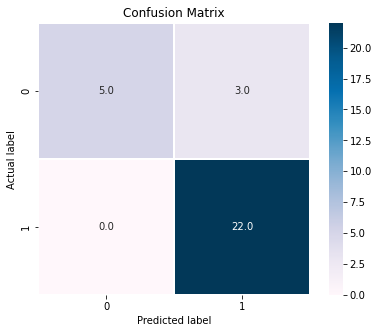

In [114]:

y_pred=logreg_cv.predict(X_test)
print(f' accuracy on test data: {logreg_cv.score(X_test, y_test)}')
test_acc.append(logreg_cv.score(X_test, y_test))
ConfusionMatrix(y_pred)

 <a name="svm"></a>
 ## Support Vector Machine

In [115]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [116]:
svm = SVC()
models.append('SVC')
gscv = GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm_cv = gscv.fit(X_train,y_train)

In [117]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
train_acc.append(svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.9325757575757574


 accuracy on test data: 0.9333333333333333


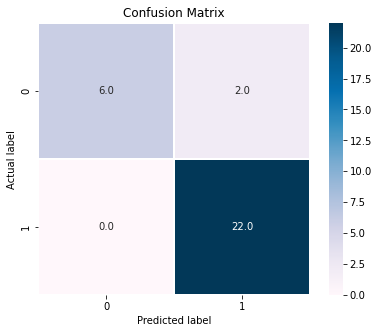

In [118]:
y_pred=svm_cv.predict(X_test)
print(f' accuracy on test data: {svm_cv.score(X_test, y_test)}')
test_acc.append(svm_cv.score(X_test, y_test))
ConfusionMatrix(y_pred)

<a name="dtc"></a>

## Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [120]:
tree = DecisionTreeClassifier()
models.append('DecisionTree')
gscv = GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv = gscv.fit(X_train,y_train)

In [121]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
train_acc.append(tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8992424242424242


 accuracy on test data: 0.7666666666666667


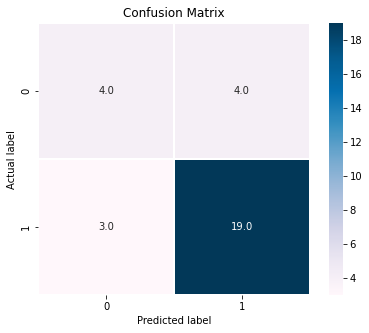

In [122]:
y_pred=tree_cv.predict(X_test)
print(f' accuracy on test data: {tree_cv.score(X_test, y_test)}')
test_acc.append(tree_cv.score(X_test, y_test))
ConfusionMatrix(y_pred)

<a name="knn"></a>

## K Nearest Neighbors

In [123]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [124]:
KNN = KNeighborsClassifier()
models.append('KNeighbors')
gscv = GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv = gscv.fit(X_train,y_train)

In [125]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
train_acc.append(knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.9075757575757576


 accuracy on test data: 0.8333333333333334


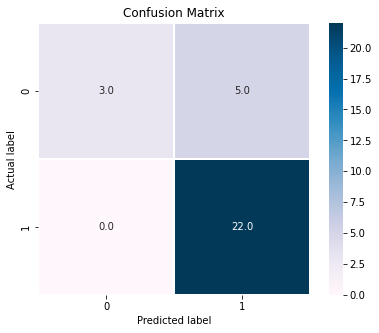

In [126]:
y_pred=knn_cv.predict(X_test)
print(f' accuracy on test data: {knn_cv.score(X_test, y_test)}')
test_acc.append(knn_cv.score(X_test, y_test))
ConfusionMatrix(y_pred)

<a name="me"></a>
# Model Evaluation

In [127]:
#creates a dataframe of model AUC and recalls
model_metrics = pd.DataFrame({
    'models' : models,
    'Train_Accuracy' : train_acc,
    'Test_Accuracy' : test_acc
})
model_metrics= round(model_metrics,2)
model_metrics

,models,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.89,0.90
1,SVC,0.93,0.93
2,DecisionTree,0.90,0.77
3,KNeighbors,0.91,0.83


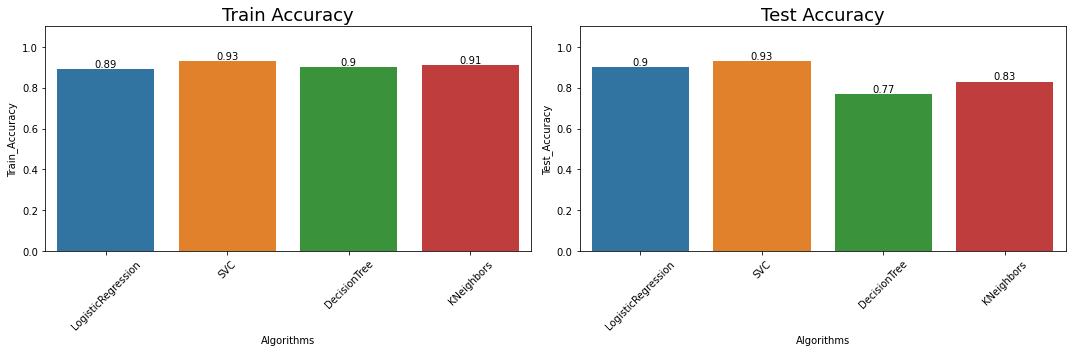

In [128]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
ax=sns.barplot(data=model_metrics, x='models', y='Train_Accuracy', ax=ax1)
plt.xlabel('Algorithms')
plt.title('Train Accuracy', fontsize=18)
plt.ylim([0.0, 1.1])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

ax2=plt.subplot(1, 2, 2)
ax=sns.barplot(data=model_metrics, x='models', y='Test_Accuracy', ax=ax2)
plt.xlabel('Algorithms')
plt.title('Test Accuracy', fontsize=18)
plt.ylim([0.0, 1.1])
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout();

From the above BAr chart Support Vector has the best accuracy on the test data. also from it confusion matrix it predicted successful landings ```100% ```correctly and  it correctly predictedn unsuccessful landing is ```75%``` 

In [129]:
f"It best parameters are: {svm_cv.best_params_}"

"It best parameters are: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}"